In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
students = pd.read_csv("students.csv")
count_row = students.shape[0] 
count_column = students.shape[1]
column_names = students.columns
print(students.shape)
print(students)

(8239, 16)
      stud.id                 name  gender  age  height  weight    religion  \
0      833917  Gonzales, Christina  Female   19     160    64.8      Muslim   
1      898539       Lozano, T'Hani  Female   19     172    73.0       Other   
2      379678       Williams, Hanh  Female   22     168    70.6  Protestant   
3      807564          Nem, Denzel    Male   19     183    79.7       Other   
4      383291      Powell, Heather  Female   21     175    71.4    Catholic   
...       ...                  ...     ...  ...     ...     ...         ...   
8234   818044          Her, Joshua    Male   22     181    79.1  Protestant   
8235   560166           Reid, Jose    Male   23     178    72.6    Catholic   
8236   380174     Villa, Raechelle  Female   20     169    67.7       Other   
8237   540967         Ngo, Preston    Male   23     195    98.6       Other   
8238   413207     Bernhard, Estela  Female   19     170    69.0      Muslim   

      nc.score semester                 

In [6]:
missing_data = students.isnull()
print("Missing Data:\n", missing_data)

Missing Data:
       stud.id   name  gender    age  height  weight  religion  nc.score  \
0       False  False   False  False   False   False     False     False   
1       False  False   False  False   False   False     False     False   
2       False  False   False  False   False   False     False     False   
3       False  False   False  False   False   False     False     False   
4       False  False   False  False   False   False     False     False   
...       ...    ...     ...    ...     ...     ...       ...       ...   
8234    False  False   False  False   False   False     False     False   
8235    False  False   False  False   False   False     False     False   
8236    False  False   False  False   False   False     False     False   
8237    False  False   False  False   False   False     False     False   
8238    False  False   False  False   False   False     False     False   

      semester  major  minor  score1  score2  online.tutorial  graduated  \
0       

In [9]:
# Summary of missing values
missing_summary = students.isnull().sum() / len(students) * 100
print("\nMissing Data Summary (in percentage):\n", missing_summary)


Missing Data Summary (in percentage):
 stud.id             0.000000
name                0.000000
gender              0.000000
age                 0.000000
height              0.000000
weight              0.000000
religion            0.000000
nc.score            0.000000
semester            0.000000
major               0.000000
minor               0.000000
score1             40.623862
score2             40.623862
online.tutorial     0.000000
graduated           0.000000
salary             78.723146
dtype: float64


In [28]:
mean_salary = students['salary'].mean()
score1_mean = students['score2'].mean()
score2_mean = students['score2'].mean()
height_mean = students['height'].mean()
students.fillna({'score1':score1_mean, 'score2':score2_mean,'salary':mean_salary,'height':height_mean}, inplace=True)

In [14]:
# Summary of missing values
missing_summary = students.isnull().sum() / len(students) * 100
print("\nMissing Data Summary (in percentage):\n", missing_summary)


Missing Data Summary (in percentage):
 stud.id             0.000000
name                0.000000
gender              0.000000
age                 0.000000
height              0.000000
weight              0.000000
religion            0.000000
nc.score            0.000000
semester            0.000000
major               0.000000
minor               0.000000
score1             40.623862
score2             40.623862
online.tutorial     0.000000
graduated           0.000000
salary              0.000000
dtype: float64


(array([   3.,   32.,  126.,  246.,  661., 1036., 1263., 1074., 1239.,
        1148.,  786.,  372.,  207.,   38.,    8.]),
 array([135.        , 139.73333333, 144.46666667, 149.2       ,
        153.93333333, 158.66666667, 163.4       , 168.13333333,
        172.86666667, 177.6       , 182.33333333, 187.06666667,
        191.8       , 196.53333333, 201.26666667, 206.        ]),
 <BarContainer object of 15 artists>)

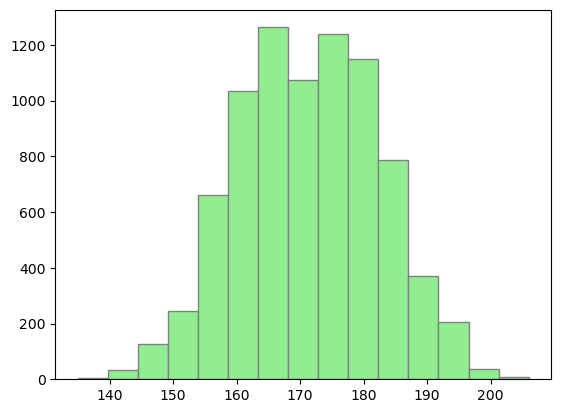

In [30]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(students["height"], bins="sturges", color="lightgreen", edgecolor="grey")

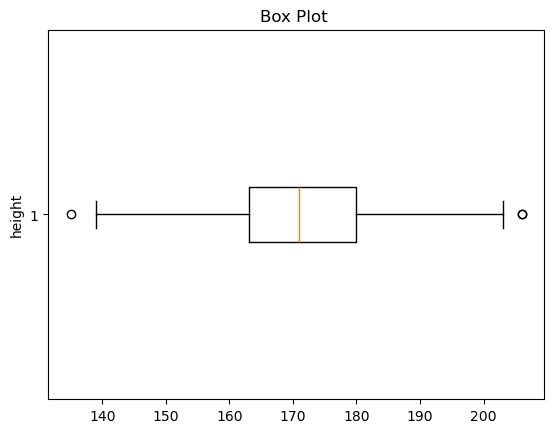

In [34]:
plt.boxplot(students['height'],vert=0)
plt.title("Box Plot ")
plt.ylabel("height")

plt.show()

Outliers: [135, 206, 206]


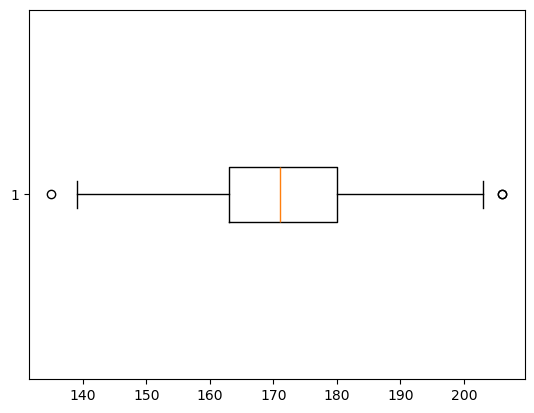

In [41]:
import numpy as np
import matplotlib.pyplot as plt
Q1 = np.percentile(students['height'], 25)
Q3 = np.percentile(students['height'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = [x for x in students['height'] if x < lower_bound or x > upper_bound]
print("Outliers:", outliers)
plt.boxplot(students['height'],vert=0)
plt.show()

0       160
1       172
2       168
3       183
4       175
       ... 
8234    181
8235    178
8236    169
8237    195
8238    170
Name: height, Length: 8236, dtype: int64
Outliers: []


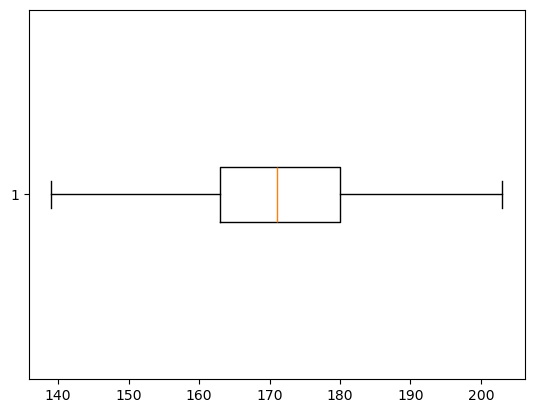

In [86]:
###Remove the outliers
outliers = [135,206]
students_filtered = students[~students['height'].isin(outliers)]
print(students_filtered['height'])

###Check again if the outliers have been removed
import numpy as np
import matplotlib.pyplot as plt
data = students_filtered['height'] # required data is for column "height"
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = [x for x in data if x < lower_bound or x > upper_bound]
print ("Outliers:", outliers)
plt.boxplot(data,vert=0)
plt.show()

In [52]:
## What is the probability of randomly picked female student from the student data set with a height less or equal to 168cm?
female = students.loc[students["gender"]== "Female"]

height = 168
mean = np.mean(female['height'])
std_dev = np.std(students['height'])
print(mean,std_dev)
z_height = (height - mean) / std_dev
prob = norm.cdf(z_height)
percent = prob * 100
print("percentage of students female who got less than 168 :", round(percent,2), "%")


171.38075009103048 11.076856852612634


In [61]:
## What is the probability of randomly picked female student from the student data set with a height less or equal to 168cm?
from scipy.stats import norm
female = students.loc[students["gender"]== "Female"]

height = 168
mean = np.mean(female['height'])
std_dev = np.std(female['height'])
print(mean,std_dev)
z_height = (height - mean) / std_dev
prob = norm.cdf(z_height)
percent = prob * 100
print("percentage of students female who got less than 168 :", round(percent,2), "%")

163.65328467153284 7.918762263149207
percentage of students female who got less than 168 : 70.85 %


In [78]:
## What is the probability of randomly picked female student from the student data set with a height less or equal to 168cm?
from scipy.stats import norm
female = students.loc[students["gender"]== "Female"]

height = 175
mean = np.mean(female['height'])
std_dev = np.std(female['height'])
print(mean,std_dev)
z_height = (height - mean) / std_dev
prob = norm.cdf(z_height)
percent = (1-prob) * 100
print("percentage of students female who got greater than 175 :", round(percent,2), "%")

163.65328467153284 7.918762263149207
percentage of students female who got greater than 175 : 7.59 %


In [76]:

from scipy.stats import norm
mean = np.mean(female['height'])
std_dev = np.std(female['height'])
height1 = 170
height2 = 180
z_height1 = (height1 - mean) / std_dev
z_height2 = (height2 - mean) / std_dev
prob= norm.cdf(z_height2) - norm.cdf(z_height1)
percent = prob * 100
print("percentage of female who got height greater than 170  and less than 180 :", round(percent,2), "%")

percentage of female who got height greater than 170  and less than 180 : 19.19 %


In [84]:
prob= 0.60
mean = np.mean(female['height'])
std_dev = np.std(female['height'])
height1= prob * std_dev + mean
height= norm.ppf(prob, mean, std_dev)
print(height)

165.65948015132278
